# Laboratorio 3
Diana Díaz 21066
Mariel Guamuche 21150

## Configuración del entorno
1.1 Instalación de Dependencias 

In [1]:
!pip install mlflow feast scikit-learn pandas numpy matplotlib seaborn

INFO: pip is looking at multiple versions of mcp to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mcp to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached pywin32-311-cp312-cp312-win_amd64.whl.metadata (10 kB)
INFO: pip is looking at multiple versions of feast to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of feast to determine which version is compatible with other requirements. This could take a while.
  Using cached partd-1.4.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl.m

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.34.0 requires protobuf<5,>=3.20, but you have protobuf 6.33.0 which is incompatible.
streamlit 1.34.0 requires rich<14,>=10.14.0, but you have rich 14.2.0 which is incompatible.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.33.0 which is incompatible.


      Successfully uninstalled fastapi-0.104.1
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 53/62 [fastapi]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   ---------------------------------- ----- 54/62 [databricks-sdk]
   -

1.2 Verificación de instalación

In [5]:
import mlflow
import feast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("mlflow.__version__", mlflow.__version__)
print("feast.__version__", feast.__version__)

mlflow.__version__ 3.5.0
feast.__version__ 0.47.0


## 2 Carga y exploración de datos

2.1 Carga del dataset

In [20]:
from sklearn.datasets import fetch_california_housing
# Cargar el dataset de California Housing
data = fetch_california_housing(as_frame=True)
df = data.frame
# Mostrar las primeras filas del DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# Convertir las columnas con nombre de columnas
df.rename(columns={
    'MedInc': 'ingresos_medios',
    'HouseAge': 'promedio_edad_casas',
    'AveRooms': 'promedio_num_habitaciones',
    'AveBedrms': 'promedio_num_dormitorios',
    'Population': 'poblacion_distrito',
    'AveOccup': 'promedio_personas_casa',
    'Latitude': 'latitud',
    'Longitude': 'longitude',
    'MedHouseVal': 'target_valor_medio_casa'
}, inplace=True)   
# Mostrar las primeras filas del DataFrame con nombres modificados
df.head()

,ingresos_medios,promedio_edad_casas,promedio_num_habitaciones,promedio_num_dormitorios,poblacion_distrito,promedio_personas_casa,latitud,longitude,target_valor_medio_casa
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# información básica del DataFrame
df.shape

(20640, 9)

In [23]:
# información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos_medios            20640 non-null  float64
 1   promedio_edad_casas        20640 non-null  float64
 2   promedio_num_habitaciones  20640 non-null  float64
 3   promedio_num_dormitorios   20640 non-null  float64
 4   poblacion_distrito         20640 non-null  float64
 5   promedio_personas_casa     20640 non-null  float64
 6   latitud                    20640 non-null  float64
 7   longitude                  20640 non-null  float64
 8   target_valor_medio_casa    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Los tipos de datos son congruentes a las variables

2.2 Análisis exploratorio

In [24]:
# descripción estadística del DataFrame
df.describe()

,ingresos_medios,promedio_edad_casas,promedio_num_habitaciones,promedio_num_dormitorios,poblacion_distrito,promedio_personas_casa,latitud,longitude,target_valor_medio_casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
# Cantidad de valores nulos por columna
df.isnull().sum()

ingresos_medios              0
promedio_edad_casas          0
promedio_num_habitaciones    0
promedio_num_dormitorios     0
poblacion_distrito           0
promedio_personas_casa       0
latitud                      0
longitude                    0
target_valor_medio_casa      0
dtype: int64

El dataset pareciera no presentar problemas. Hay que verificar la distribución en la cantidad de habitaciones y dormitorios, ya que pareciera haber outlayers

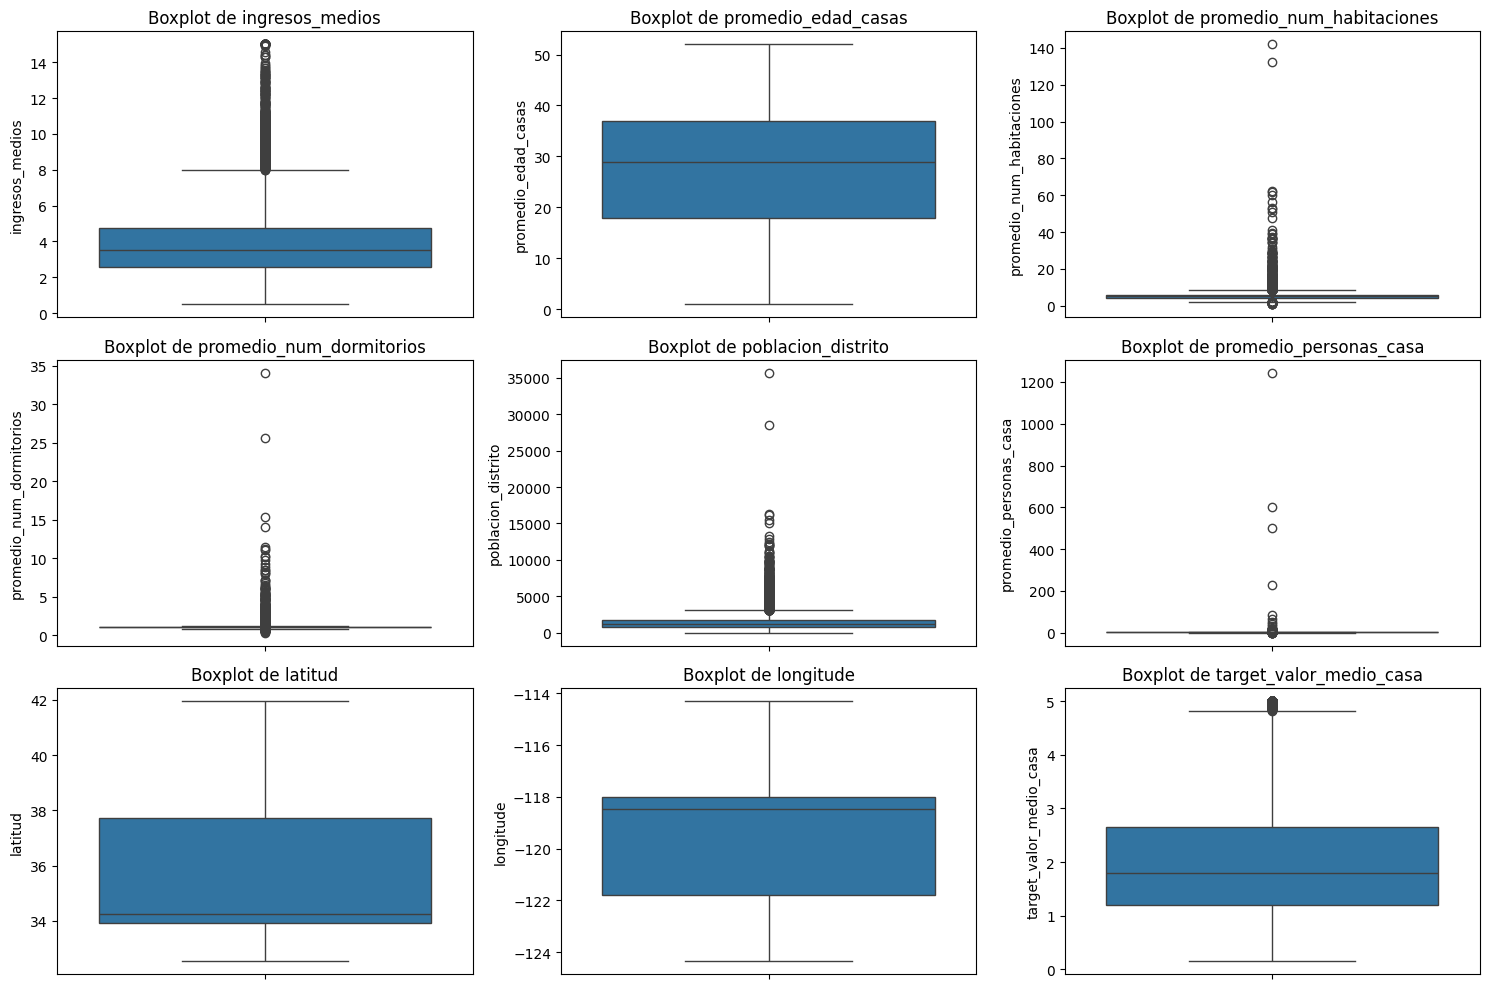

In [26]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

- Los ingresos_medios presentan una distribución sesgada a la derecha; hay outlayers a partir de 10K USD.
- promedio_edad_casas presenta muchos outliers; presentando localizaciones con más de 100 habitaciones en promedio.
- promedio_num_dormitorios presenta sesgo, con outliers al igual que la variable anterior.
- poblacion_distriro alta concentración en valores bajos y algunso distritos con poblaciones con alta concentración de personas.
- promedio_personas_casa presenta sesgo, con valores poco razonables de la cantidad de personas que pueden habitar en una vivienda.
- target_valor_medio_casas: distribución moderadamente sesgada a la derecha, con pocos outliers.

Es evidente que 5 de las 9 variables tienen outlayers, dependiendo de los modelos podría convenir eliminar los outliers en especial con el de regresión lineal. Se realizará este filtrado en las variables de habitaciones y de población 

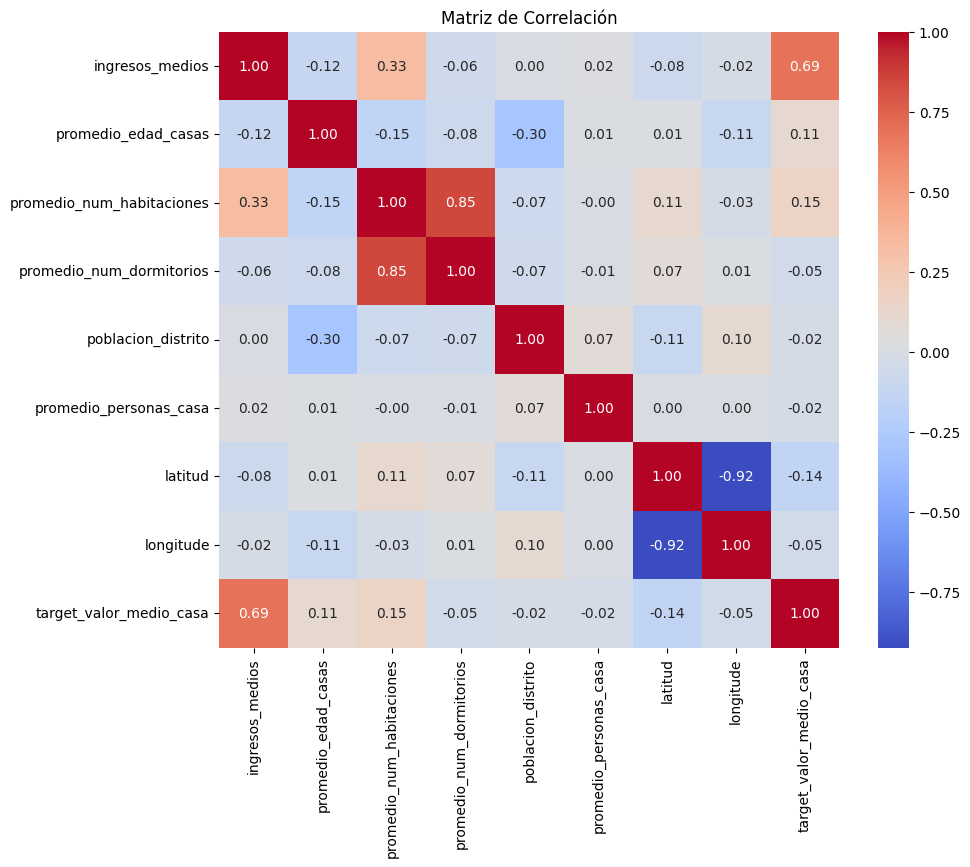

In [27]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Las relaciones entre las variables, son fuerte entre las de carácter económico (ingresos_medios y target_valor_medio_casa), las de localización geográfica (latitud y longitud) y las de habitaciones (promedio_num_habitaciones y promedio_num_dormitorios)

## 3. Preparación de datos
3.0 Eliminación de outliers

In [29]:
filt = (
    (df["promedio_num_habitaciones"] < 50) &   # evitar promedios irreales
    (df["promedio_personas_casa"]   < 15) &    # evitar divisiones pequeñas
    (df["promedio_num_dormitorios"] < 10)      # por coherencia con habitaciones
)
df_clean = df.loc[filt].reset_index(drop=True)
print(df.shape, "->", df_clean.shape)
df_clean.describe()

(20640, 9) -> (20611, 9)


,ingresos_medios,promedio_edad_casas,promedio_num_habitaciones,promedio_num_dormitorios,poblacion_distrito,promedio_personas_casa,latitud,longitude,target_valor_medio_casa
count,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000
mean,3.870846,28.641017,5.397109,1.089819,1424.541070,2.927035,35.630314,-119.569653,2.068853
std,1.899354,12.582577,1.858310,0.314566,1128.840143,0.813899,2.135323,2.003912,1.153895
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564150,18.000000,4.440403,1.006095,788.000000,2.429869,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.228571,1.048721,1166.000000,2.817778,34.260000,-118.490000,1.798000
75%,4.743700,37.000000,6.051208,1.099371,1724.000000,3.280652,37.710000,-118.010000,2.649000
max,15.000100,52.000000,41.333333,9.703704,35682.000000,14.000000,41.950000,-114.310000,5.000010


3.1 Feature engineering
Las variables que implementarán son:
- ratio_habitaciones_hogar indica el tamaño medio del hogar por persona (espacio disponible), se pensaría que las zonas con más espacio por persona tienen precios más altos
- ratio_habitaciones_poblacion es la densidad de habitaciones por cantidad total de personas.
- ratio_dormitorios_habitacion es la proporción de dormitorios respecto a habitaciones totales
- ingreso_persona es el nivel de ingreso ajustado por cantidad promedio de personas

In [32]:
# Ratios espaciales y socioeconómicos
df_clean["ratio_habitaciones_hogar"] = (
    df_clean["promedio_num_habitaciones"] / df_clean["promedio_personas_casa"]
)

df_clean["ratio_habitaciones_poblacion"] = (
    df_clean["promedio_num_habitaciones"] / df_clean["poblacion_distrito"]
)

df_clean["ratio_dormitorios_habitacion"] = (
    df_clean["promedio_num_dormitorios"] / df_clean["promedio_num_habitaciones"]
)

df_clean["ingreso_persona"] = (
    df_clean["ingresos_medios"] / df_clean["promedio_personas_casa"]
)

# Reemplazar valores infinitos o nulos por mediana
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

3.2 División de datos

Este punto se ha realizado después y no antes de definir las features por simplicidad

In [33]:
from sklearn.model_selection import train_test_split
# Separar características y variable objetivo
X = df_clean.drop('target_valor_medio_casa', axis=1)
y = df_clean['target_valor_medio_casa']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y):", y_train.shape)
print("Tamaño del conjunto de prueba (y):", y_test.shape)

Tamaño del conjunto de entrenamiento: (16488, 12)
Tamaño del conjunto de prueba: (4123, 12)
Tamaño del conjunto de entrenamiento (y): (16488,)
Tamaño del conjunto de prueba (y): (4123,)


## 4. Experimentación con MLFlow
4.1 Configuración de MLFlow

In [ ]:
import mlflow.sklearn
import mlflow

# configurar tracking URI de MLFlow
mlflow.set_tracking_uri("file:///tmp/mlruns")
# iniciar una nueva corrida de MLFlow